# Data Transformation
Data transformation (Transformasi data) adalah tahap selanjutnya dalam persiapan data dalam data processing. Transformasi data adalah tahapan di mana data ditransformasikan dan dikonsolidasikan ke dalam bentuk yang sesuai untuk mining (Han dkk.,2012). 

Menurut Junaedi dkk.(2011) beberapa langkah yang dilakukan dalam transformasi data, yaitu normalization, discretization, smoothing, atrribute construction, dan aggregation.

Sumber : https://flinsetyadi.com/persiapan-data-dalam-data-mining-data-transformation/

## Normalization
Normalization adalah proses pengelompokkan atribut ke dalam hubungan yang terstruktur dengan baik dan bebas dari anomali (Lee, 1995). Normalization digunakan untuk melakukan transformasi sebuah atribut numerik yang diskalakan dalam range yang lebih kecil. Metode yang digunakan untuk melakukan normalisasi adalah
* min-max normalization

Min-max normalization memetakan sebuah value v dari atribut A menjadi v' ke dalam range [new_minA, new_maxA] berdasarkan persamaan berikut

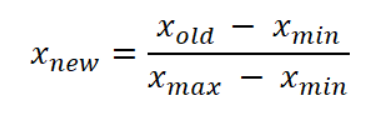

* z-score normalization

Z-score Normalization atau zero-mean normalization, dimana value dari sebuah atribut A dinormalisasi berdasarkan nilai rata-rata dan standar deviasi dari atribut A. Sebuah value v dari atribut A dinormalisasi menjadi v' dengan rumus: 

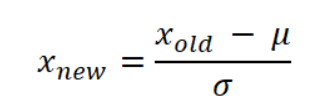

* simple feature scaling

Metode normalisasi data yang terakhir adalah simple feature scaling. Cara ini akan menghasilkan nilai baru hasil normalisasi yang berkisar antara 0 dan 1. 

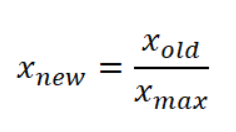

Sumber :https://ilmudatapy.com/metode-normalisasi-data/#:~:text=Normalisasi%20data%20adalah%20proses%20membuat,analisis%20statistik%20menjadi%20lebih%20mudah.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

data = sns.load_dataset('iris')
print(data.head())
print(data.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [2]:
#min-max method
data['sepal_length']=(data['sepal_length']-data['sepal_length'].min())/(data['sepal_length'].max()-data['sepal_length'].min())
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,3.5,1.4,0.2,setosa
1,0.166667,3.0,1.4,0.2,setosa
2,0.111111,3.2,1.3,0.2,setosa
3,0.083333,3.1,1.5,0.2,setosa
4,0.194444,3.6,1.4,0.2,setosa


In [3]:
#Z-score method
data['sepal_width']=(data['sepal_width']-data['sepal_width'].mean())/data['sepal_width'].std()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,1.015602,1.4,0.2,setosa
1,0.166667,-0.131539,1.4,0.2,setosa
2,0.111111,0.327318,1.3,0.2,setosa
3,0.083333,0.097889,1.5,0.2,setosa
4,0.194444,1.245030,1.4,0.2,setosa


In [4]:
#Simple Feature Scaling
data['petal_length']=data['petal_length']/data['petal_length'].max()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,1.015602,0.202899,0.2,setosa
1,0.166667,-0.131539,0.202899,0.2,setosa
2,0.111111,0.327318,0.188406,0.2,setosa
3,0.083333,0.097889,0.217391,0.2,setosa
4,0.194444,1.245030,0.202899,0.2,setosa


In [5]:
from sklearn import preprocessing
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
del data['species']
normalize_data = preprocessing.normalize(data)
scaled_data = pd.DataFrame(normalize_data,columns =names)
scaled_data.head()

,0,1,2,3
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


In [7]:
data = sns.load_dataset('iris')
del data['species']
scaler = preprocessing.MinMaxScaler(feature_range=(0, 2))
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.444444,1.250000,0.135593,0.083333
1,0.333333,0.833333,0.135593,0.083333
2,0.222222,1.000000,0.101695,0.083333
3,0.166667,0.916667,0.169492,0.083333
4,0.388889,1.333333,0.135593,0.083333


## Discretization
Discretization digunakan untuk mereduksi sekumpulan nilai yang terdapat pada atribut continuous, dengan membagi range dari atribut ke dalam interval. Proses diskretisasi secara umum terdiri dari 4 tahapan, yaitu
* Sorting, melakukan sorting nilai atribut continuous yang mau didiskretisasi.
* Memilih "cut-point", banyak fungsi evaluasi yang dapat digunakan seperti binning dan pengukuran entropy.
* Splitting, dilakukan evaluasi cut-point yang ada dan pilih satu yang terbaik dan lakukan split range nilai atribut continuous ke dalam dua partisi. Diskretisasi berlanjut untuk setiap partisi sampai kondisi berhenti tercapai.
* Stopping criterion, diperlukan untuk menghentikan proses diskretisasi.

Umumnya terdapat 5 metode yang digunakan untuk melakukan diskretisasi pada atribut continuous, yaitu : binning, cluster analysis, histogram analysis, entropy-based discretization, dan segmentation by "natural partitioning".

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Student_bucketing.csv',header = 0)
df.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


In [9]:
df['bucket'] = pd.cut(df['marks'],5,labels = ['Poor','Below_average','Average','Above_Average','Excellent'])
df.head(15)

,Student_id,Age,Grade,Employed,marks,bucket
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below_average
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Average
5,6,20,2nd Class,yes,53,Average
6,7,19,3rd Class,yes,78,Above_Average
7,8,21,3rd Class,yes,70,Above_Average
8,9,22,3rd Class,yes,97,Excellent
9,10,21,1st Class,no,58,Average


In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Student_bucketing.csv',header = 0)
def binningFunction(col, cut_points, labels=None) :
    minval = col.min()
    maxval = col.max()
    break_points = [minval] + cut_points + [maxval]
    print(break_points)
    if not labels :
        labels = range(len(cut_points)+1)
    colBin = pd.cut(col, bins=break_points, labels = labels, include_lowest=True)
    return colBin

cut_points = [30,50,60,70];
labels = ['Poor','Below_average','Average','Above_Average','Excellent']
data['bucket'] = binningFunction(data['marks'], cut_points, labels)
data.head(15)

[20, 30, 50, 60, 70, 98]


,Student_id,Age,Grade,Employed,marks,bucket
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below_average
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Average
5,6,20,2nd Class,yes,53,Average
6,7,19,3rd Class,yes,78,Excellent
7,8,21,3rd Class,yes,70,Above_Average
8,9,22,3rd Class,yes,97,Excellent
9,10,21,1st Class,no,58,Average


## Smoothing
Smoothing dilakukan jika data mengandung noise/nilai yang tidak valid terhadap data yang di-mining. Untuk mengatasinya harus dilakukan smoothing (dengan memperhatikan nilai-nilai tetangga). Metode yang umumnya digunakan dalam smoothing yakni:
* Binning
* Clustering
* Regression

## Aggregation
Aggregation adalah operasi summary (peringkasan) diaplikasikan pada data numerik. Misalnya pada data penjualan harian digabungkan untuk menghitung pendapatan perbulan dan pertahun dirata-rata atau ditotal. Langkah ini dilakukan dengan memanfaatkan operator data cube (operasi roll up/meringkas).

## Atribute/ Feature Construction
Pada attribute construction, atribut baru dibentuk dari atribut yang sudah ada dan ditambahkan bersama atribut lainnya untuk membantu meningkatkan ketelitian/ketepatan dan pemahaman struktur dalam high-dimensional data. Contohnya, mau menambahkan atribut luas berdasarkan atribut tinggi dan lebar. Atau, atribut lama kerja jadi dosen dan usia bisa digantikan dengan senioritas, yunioritas, dan orientasi.

# Reduksi Dimensi
Data reduction (reduksi data) adalah transformasi data menjadi bentuk yang disederhanakan. Tujuan dari reduksi dimensi yaitu untuk mengatasi keterbatasan penyimpanan data dalam database dan mengatasi lamanya waktu yang dibutuhkan untuk menganalisis data yang kompleks dalam tiap dataset yang lengkap.

## PCA
Salah satu metode yang digunakan yaitu Principal Component Analysis (PCA). Metode ini hanya berfungsi untuk data numerik. Langkah-langkah yang dilakukan yaitu :
* normalisasi data input : setiap atribut berada dalam kisaran yang sama
* menghitung vektor ortonormal, yaitu komponen utama
* setiap data input (vektor) adalah kombinasi linear dari nilai k vektor komponen utama.
* komponen utama diurutkan dalam urutan decreasing
* Karena komponen diurutkan, ukuran data dapat dikurangi dengan menghilangkan komponen yang lemah, yaitu komponen-komponen dengan variansi rendah.

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
import missingno as msno
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
pip install missingno

In [12]:
data.species.replace({'setosa':0,'versicolor':1, 'virginica':2},inplace=True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


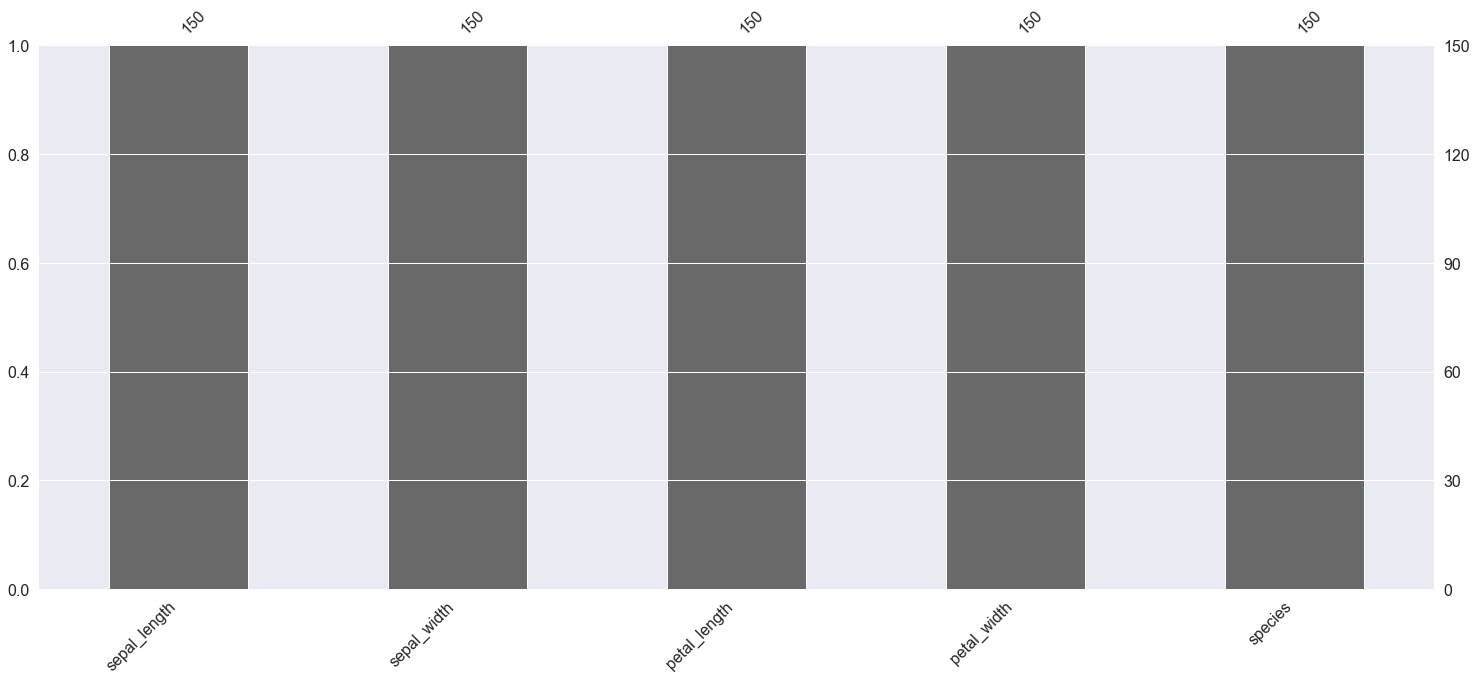

In [13]:
# visualization for the data
p=msno.bar(data)

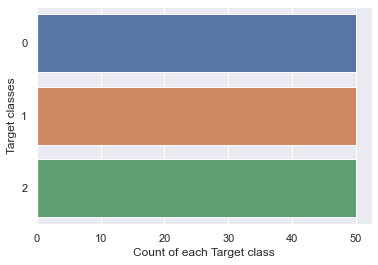

In [14]:
sns.countplot(y=data.species ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

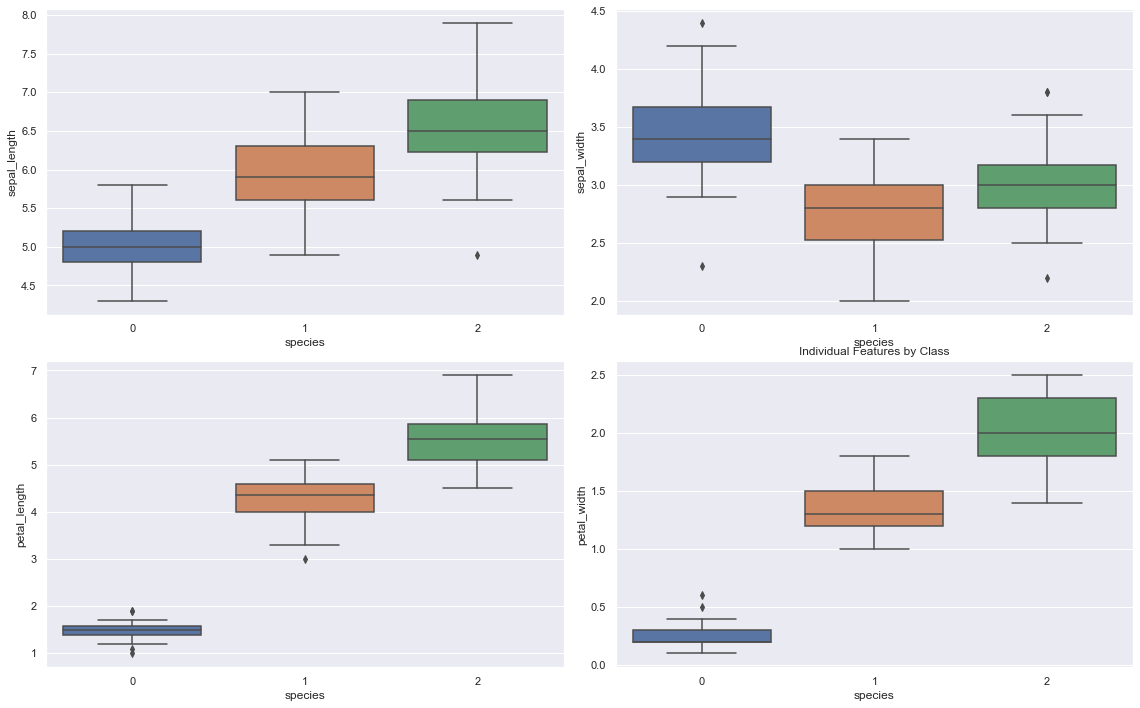

In [15]:
# individual ploting for features 
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(data.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = data['species'], y = data[data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

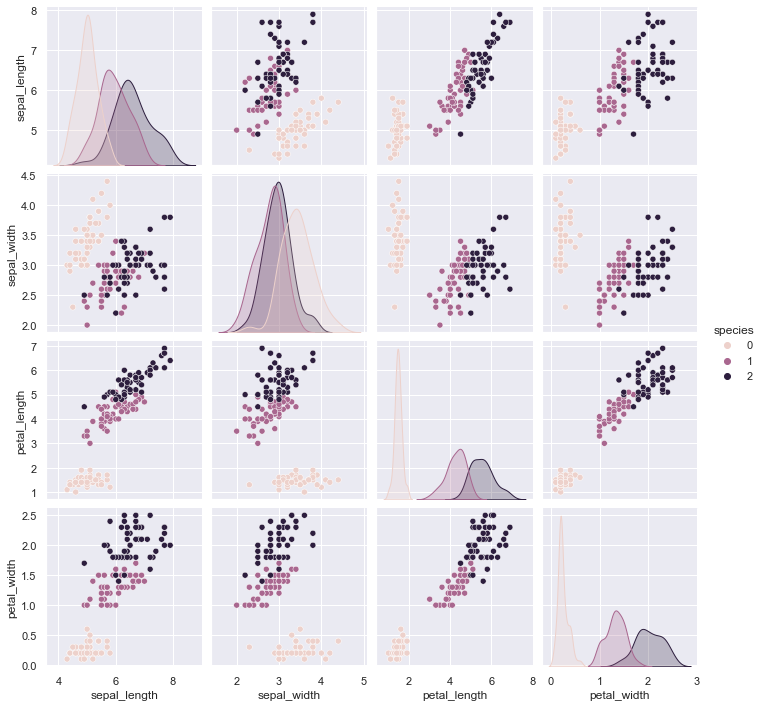

In [16]:
p=sns.pairplot(data, hue = 'species')

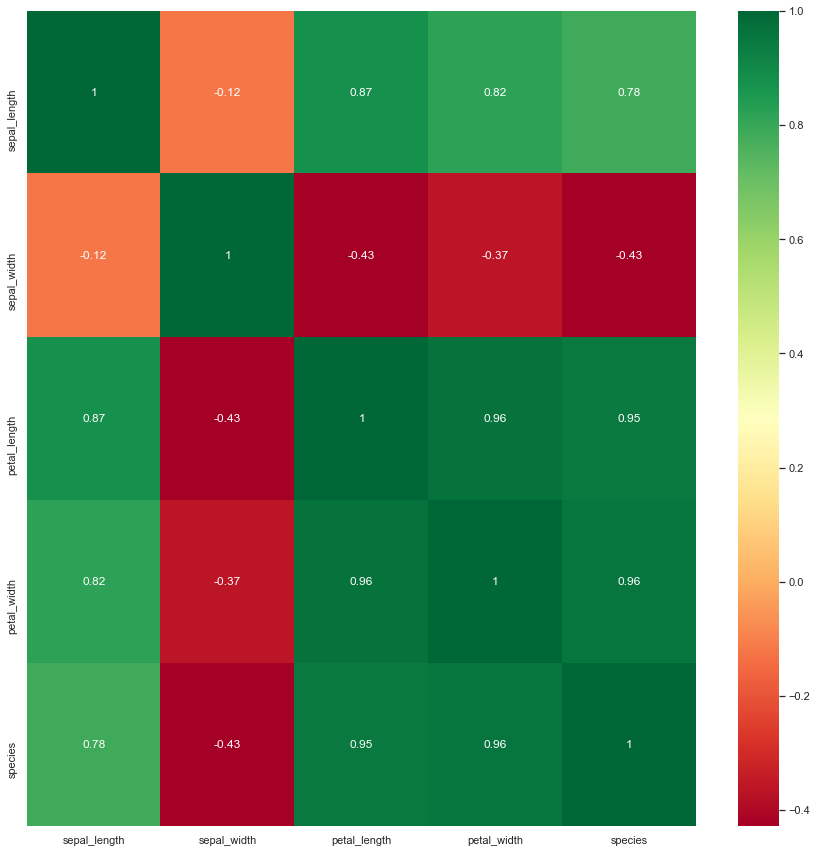

In [17]:
# heatmap plot for the correlation
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')

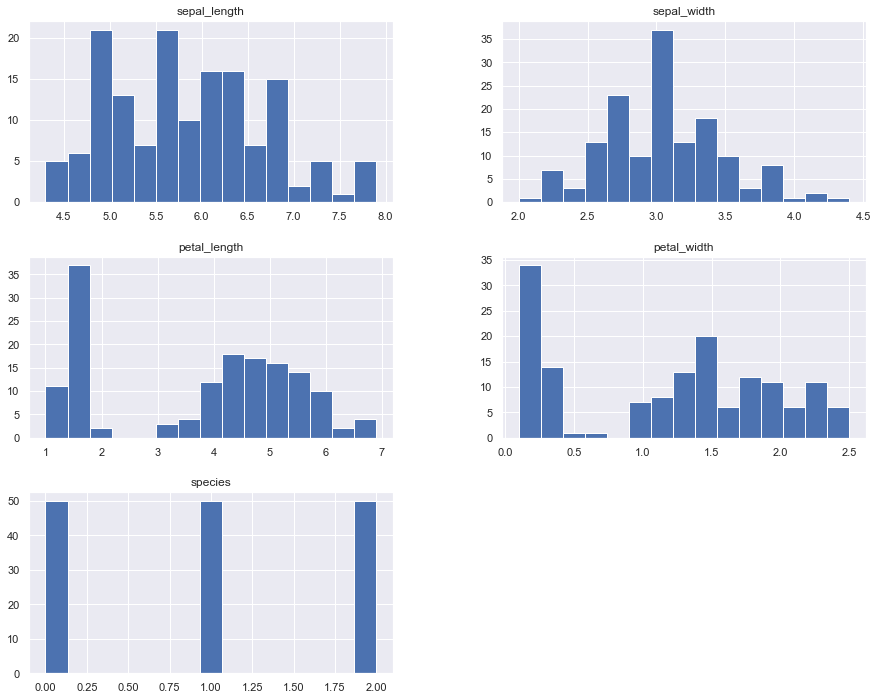

In [18]:
# plots for the features distribution
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [19]:
X = data.drop(['species'],axis=1)
y = data.species
pca = PCA()
X_new = pca.fit_transform(X)

In [20]:
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [21]:
# getting variance ratio
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.92461872 0.05306648 0.01710261 0.00521218]


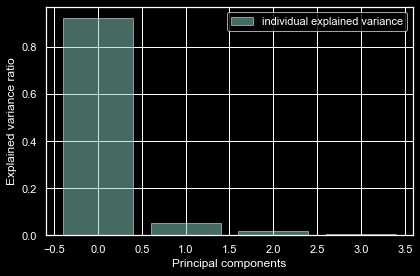

In [22]:
# plot with individual explained variance and principal components
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [23]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [24]:
# performing knn based pca over it
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


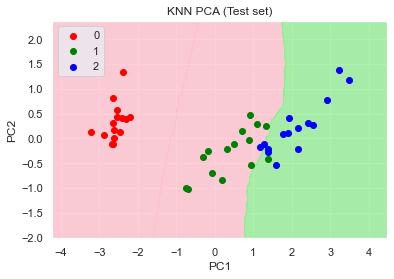

In [25]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()